Code Block 1: Import Libraries

In [2]:
# Code Block 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
%matplotlib inline


Code Block 2: Load and Merge Data

In [3]:
# Code Block 2: Load and Merge Data
df_stores = pd.read_csv('stores.csv')
df_features = pd.read_csv('features.csv')

print("Stores DataFrame:")
print(df_stores.head())
print("\nFeatures DataFrame:")
print(df_features.head())

# Merge datasets on 'Store'
df = pd.merge(df_features, df_stores, on='Store')
print("\nMerged DataFrame Shape:", df.shape)
print("\nMerged DataFrame:")
print(df.head())


Stores DataFrame:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

Features DataFrame:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        N

Code Block 3: Data Cleaning

In [4]:
# Code Block 3: Data Cleaning
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Replace 'NA' strings with np.nan
df = df.replace('NA', np.nan)

# Fill missing MarkDown values with 0
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

# Drop rows with missing CPI or Unemployment
df = df.dropna(subset=['CPI', 'Unemployment'])

# Convert IsHoliday to integer (0/1)
df['IsHoliday'] = df['IsHoliday'].astype(int)

print("\nMissing Values After Cleaning:")
print(df.isna().sum())



Missing Values After Cleaning:
Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64


Code Block 4: EDA - Summary Statistics

In [5]:
# Code Block 4: EDA - Summary Statistics
print("Summary Statistics:")
df.describe()


Summary Statistics:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size
count,7605.000000,7605,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.000000,7605.00000
mean,23.000000,2011-09-16 00:00:00,58.297325,3.389624,3331.850502,1257.632682,821.902856,1310.043445,1939.701669,172.460809,7.826821,0.076923,130287.60000
min,1.000000,2010-02-05 00:00:00,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,0.000000,34875.00000
25%,12.000000,2010-11-26 00:00:00,44.720000,3.001000,0.000000,0.000000,0.000000,0.000000,0.000000,132.364839,6.634000,0.000000,70713.00000
50%,23.000000,2011-09-16 00:00:00,59.250000,3.494000,0.000000,0.000000,0.000000,0.000000,0.000000,182.764003,7.806000,0.000000,126512.00000
75%,34.000000,2012-07-06 00:00:00,72.620000,3.742000,4167.270000,42.200000,14.740000,564.100000,2511.400000,213.932412,8.567000,0.000000,202307.00000
max,45.000000,2013-04-26 00:00:00,100.140000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,1.000000,219622.00000
std,12.988027,NaN,18.709862,0.441461,7500.751025,5695.768975,7822.371717,4778.286282,9717.363653,39.738346,1.877259,0.266487,63116.26787


Code Block 5: EDA - Correlation Heatmap

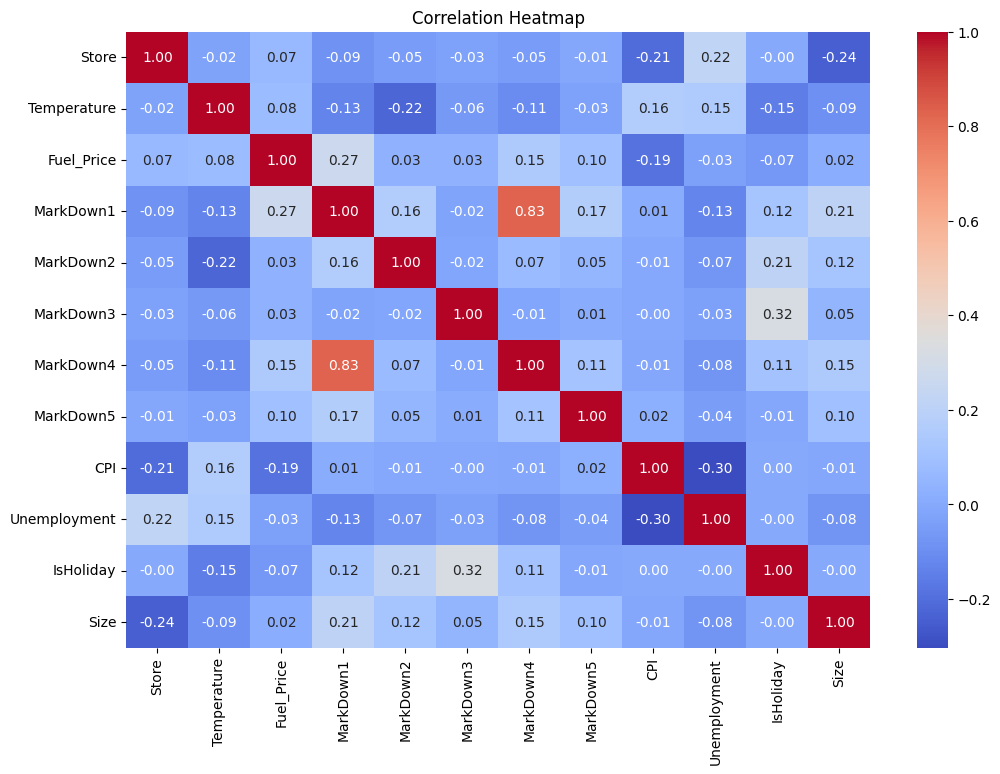

In [6]:
# Code Block 5: EDA - Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Code Block 6: EDA - Unemployment Distribution

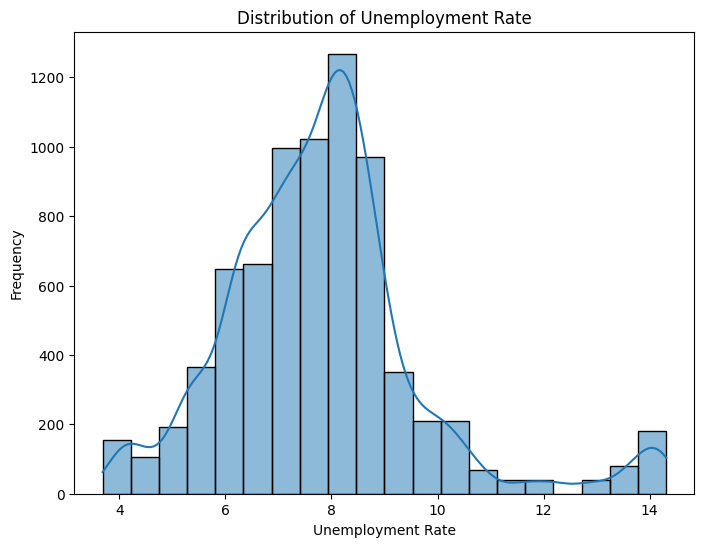

In [7]:
# Code Block 6: EDA - Unemployment Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Unemployment'], kde=True, bins=20)
plt.title('Distribution of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()


Code Block 7: EDA - Store Size by Type

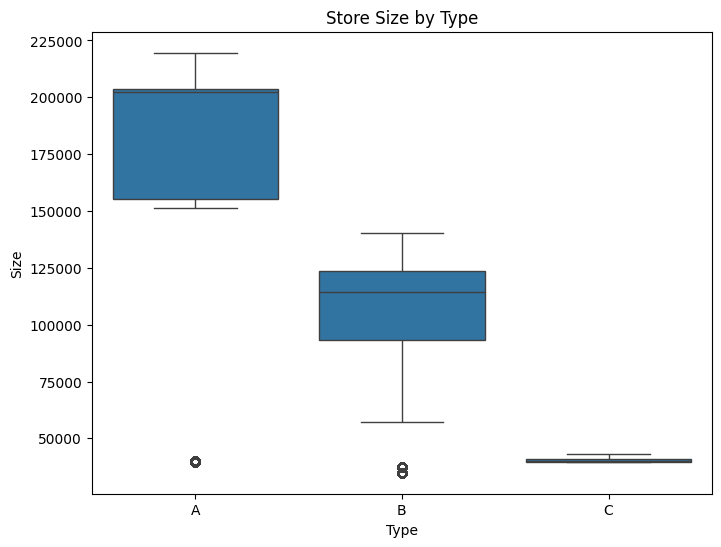

In [8]:
# Code Block 7: EDA - Store Size by Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Size', data=df)
plt.title('Store Size by Type')
plt.show()


Code Block 8: EDA - Temperature Over Time for Store 1

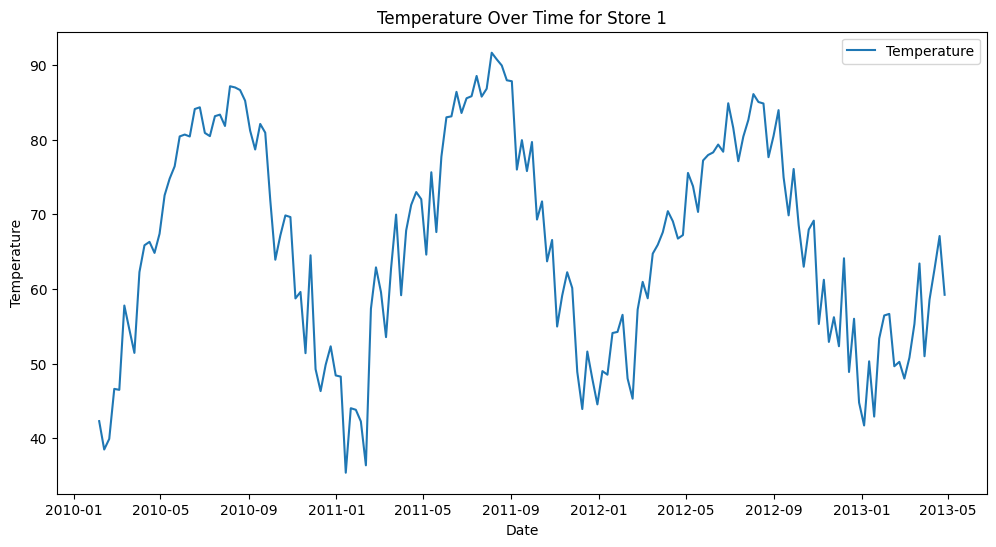

In [9]:
# Code Block 8: EDA - Temperature Over Time for Store 1
store1 = df[df['Store'] == 1]
plt.figure(figsize=(12, 6))
plt.plot(store1['Date'], store1['Temperature'], label='Temperature')
plt.title('Temperature Over Time for Store 1')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Code Block 9: EDA - Fuel Price vs CPI Scatter Plot

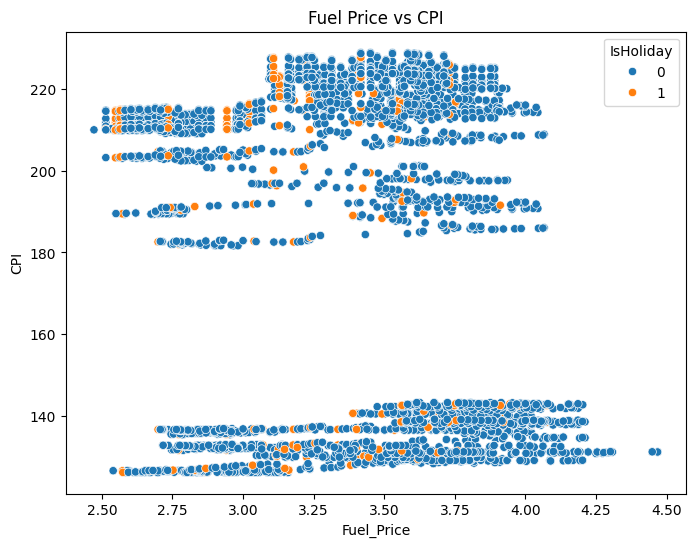

In [10]:
# Code Block 9: EDA - Fuel Price vs CPI Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel_Price', y='CPI', data=df, hue='IsHoliday')
plt.title('Fuel Price vs CPI')
plt.show()


Code Block 10: Feature Engineering

In [11]:
# Code Block 10: Feature Engineering
# Extract year, month, week from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week

print("DataFrame with New Features:")
print(df.head())


DataFrame with New Features:
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-12        38.51       2.548        0.0        0.0        0.0   
2      1 2010-02-19        39.93       2.514        0.0        0.0        0.0   
3      1 2010-02-26        46.63       2.561        0.0        0.0        0.0   
4      1 2010-03-05        46.50       2.625        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type    Size  \
0        0.0        0.0  211.096358         8.106          0    A  151315   
1        0.0        0.0  211.242170         8.106          1    A  151315   
2        0.0        0.0  211.289143         8.106          0    A  151315   
3        0.0        0.0  211.319643         8.106          0    A  151315   
4        0.0        0.0  211.350143         8.106          0    A  151315   

   Year  Month  Week 

Code Block 11: Prepare Data for Modeling

In [12]:
# Code Block 11: Prepare Data for Modeling
numeric_features = ['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 
                    'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 
                    'IsHoliday', 'Size', 'Year', 'Month', 'Week']
categorical_features = ['Type']

X = df[numeric_features + categorical_features]
y = df['Unemployment']

# Preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values.astype(np.float32)).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.astype(np.float32))
y_test_tensor = torch.tensor(y_test.values.astype(np.float32)).unsqueeze(1)

# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


Code Block 12: Define Neural Network Model

In [13]:
# Code Block 12: Define the Neural Network Model
class UnemploymentPredictor(nn.Module):
    def __init__(self, input_size):
        super(UnemploymentPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1]
model = UnemploymentPredictor(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


Code Block 13: Train the Model

In [14]:
# Code Block 13: Train the Model
epochs = 100
train_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}')


Epoch [10/100], Loss: 2.2059
Epoch [20/100], Loss: 1.9470
Epoch [30/100], Loss: 1.7093
Epoch [40/100], Loss: 1.6056
Epoch [50/100], Loss: 1.4939
Epoch [60/100], Loss: 1.4306
Epoch [70/100], Loss: 1.3717
Epoch [80/100], Loss: 1.2891
Epoch [90/100], Loss: 1.2473
Epoch [100/100], Loss: 1.2014


Code Block 14: Plot Training Loss

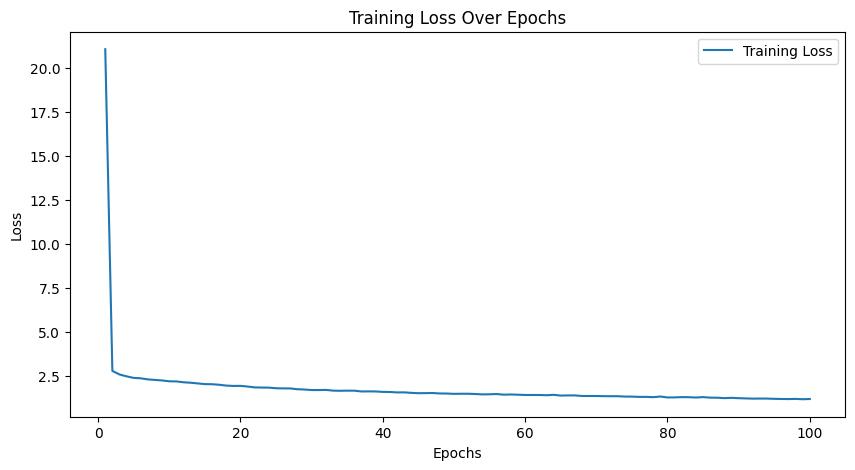

In [15]:
# Code Block 14: Plot Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()


Code Block 15: Evaluate the Model

Test MSE: 3.1427


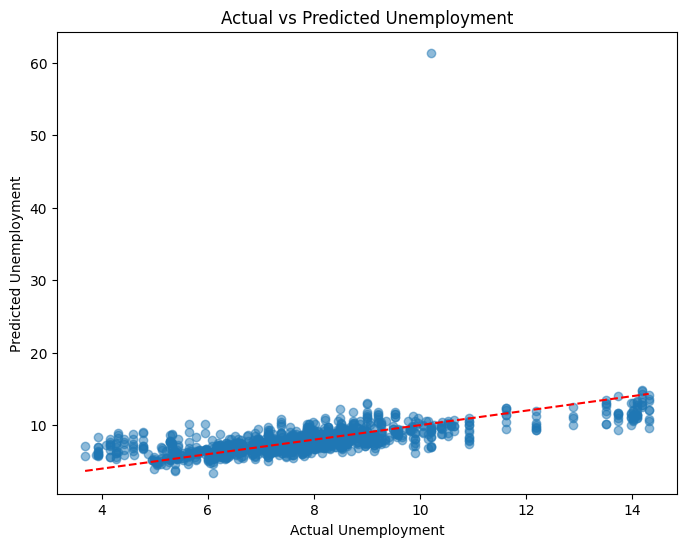

In [16]:
# Code Block 15: Evaluate the Model and Plot Results
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    test_loss = criterion(y_pred, y_test_tensor)
    print(f'Test MSE: {test_loss.item():.4f}')

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred.numpy(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Unemployment')
plt.ylabel('Predicted Unemployment')
plt.title('Actual vs Predicted Unemployment')
plt.show()
